# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


### 1. Is the distribution of body temperatures normal?

(array([ 4.,  6., 15., 26., 30., 30., 15.,  1.,  2.,  1.]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 10 Patch objects>)

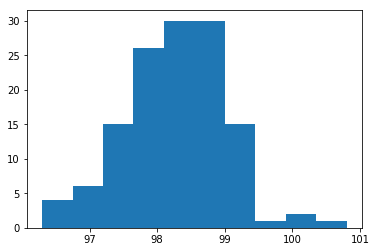

In [3]:
#Is the distribution of body temperatures normal?

temp = df['temperature']
plt.hist(temp)

We can see a normal-like shape to the data, but this is a rough approximation. It is hard to tell if the distribution is normal from it's histogram, so next we will use a normality test.

In [4]:
from scipy import stats

k,p=stats.mstats.normaltest(temp) # k = z-score returned by a combination of a skew and kurtosis test; p = p-value

# we use p value to test if the variable is normal using an alpha of 0.05
# if p is less than alpha then we can reject the null hypothesis that the sample has a normal distribution
if p<0.05:
  print('The sample does not come from a normal distribution.')
else:
  print ('The sample comes from a normal distribution.')

The sample comes from a normal distribution.


### 2. Is the sample size large? Are the observations independent?

In [5]:
n = len(df)
print(n)

130


A sample is considered 'large' enough if it has 30 or greater observations. Here we have a sample size of 130, so we can denote that our sample is large enough for CLT. 

We can also conclude that the observations are independent.

### 3. Is the true population mean really 98.6 degrees F?
- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
- Now try using the other test. How is the result be different? Why?

We will now perform a bootstrap hypothesis test with the following:

$H_0$: The population mean is 98.6. $\mu=98.6$

$H_A$: The population mean is not 98.6. $\mu\neq98.6$

In [10]:
import numpy as np

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
                                
    return bs_replicates

# translate data so that the mean is 98.6
translated_t = temp - np.mean(temp) + 98.6

bs_replicates = draw_bs_reps(translated_t, np.mean, 10000)

# find probability that the observed mean is greater than the replicates
p = np.sum(bs_replicates <= np.mean(temp)) / 10000

print("p =",p)

p = 0.0


The value of p is very small, therefore we can reject the null hypothesis and conclude that the true population mean is not 98.6.


Now, we will try frequentist statistical testing. I am going to use a one-sample test since we only have one set of data to test. We will use a t statistic because we do not know the population standard deviation.


In [11]:
temp_mean = np.mean(temp)
temp_std = np.std(temp)

se = temp_std / np.sqrt(n)

t = (temp_mean - 98.6) / se

p_val = stats.t.sf(np.abs(t), n-1)*2

print("The t-statistic is {:1.3f} and the p-value is {:1.7f}.".format(t, p_val))

The t-statistic is -5.476 and the p-value is 0.0000002.


Again, the value of p is very small so we can conclude that the true mean is most likely not 98.6.

Lets try the same test using a z-statistic. I predict that the result will be similar because the sample size is large. We know that as sample size increases, t distribution approaches the normal z distribution.

In [12]:
z = (temp_mean - 98.6)/se  

p_val_z = stats.norm.sf(np.abs(z))*2

print("The z-statistic is {:1.3f} and the p-value is {:1.8f}".format(z, p_val_z))

The z-statistic is -5.476 and the p-value is 0.00000004


Both tests have the same results. We can use either test when the sample size is large.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [13]:
# generate a random sample of 10 observations
sample = np.random.choice(temp, size=10)

I will now perform both frequentist tests.

In [14]:
# t-test

samp_mean = np.mean(sample)
samp_std = np.std(sample)

se_samp = samp_std / np.sqrt(len(sample))

t_samp = (samp_mean - 98.6) / se_samp

p_samp_t = stats.t.sf(np.abs(t_samp), len(sample)-1)*2

print("The t-statistic is {:1.3f} and the p-value is {:1.7f}.".format(t_samp, p_samp_t))


The t-statistic is -4.181 and the p-value is 0.0023721.


In [15]:
# z-test

z_samp = (samp_mean - 98.6) / se_samp

p_samp_z = stats.norm.sf(np.abs(z_samp))*2

print("The z-statistic is {:1.3f} and the p-value is {:1.8f}".format(z_samp, p_samp_z))

The z-statistic is -4.181 and the p-value is 0.00002901


The t-test is the correct method in this case since sample size is less than 30. As you can see, the difference between p-values in both tests are significantly different. This tells us that it is important to choose the correct test statistic when dealing with small sample sizes. 

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [ ]:
# bootstrap approach

bs_temp = draw_bs_reps(temp, np.mean, 10000)

ci_bs = np.percentile(bs_temp, [2.5,97.5])

ci_bs

In [ ]:
# z-test
z_val = 1.96

mean = np.mean(temp)
std = np.std(temp)
std_err = std / np.sqrt(len(temp))
margin_of_err = z_val * std_err

conf_int = (mean - margin_of_err, mean + margin_of_err)
conf_int

The 95 percent confidence interval of both tests tells us that any temperature not between 98.12 and 98.37 would be considered "abnormal".

### 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

We will test the null hypothesis that the body temperature distributions of males and females are the same. We will use a two-sample t-test since it is the appropiate method for testing the difference of means. 

In [16]:
# i will use a two-sample t-test

m_temp = df[df.gender == 'M']['temperature']
f_temp = df[df.gender == 'F']['temperature']

stats.ttest_ind(f_temp, m_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

The p-value is very small, so we can reject the null hypothesis that the temperature distributions of males and females are identical. 

## Conclusion
- Human body temperatures follow a normal distribution.
- The distribution of the data follows the conditions for the CLT and therefore also follows the conditions of the statistical tests we use in this project. 
- The accepted mean normal body temperature of 98.6 degrees F that was held for more than 120 years turns out to be statiscally incorrect. In fact, the 95% confidence interval tells us that we can expect the mean normal temperature to be between 98.12 and 98.37 degrees. 
- There is a statistically significant difference between the body temperatures of men and women. 
